In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [19]:
fact_table = pd.read_excel("case-study-data.xlsx", sheet_name = "Fact_table", engine='openpyxl')
trans_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Trans_dim", engine='openpyxl')
item_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Item_dim", engine='openpyxl')
customer_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Customer_dim", engine='openpyxl')
time_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Time_dim", engine='openpyxl')
store_dim =  pd.read_excel("case-study-data.xlsx", sheet_name = "Store_dim", engine='openpyxl')

print("data has been loaded successfully!!")

data has been loaded successfully!!


In [20]:
fact_trans = pd.merge(fact_table, trans_dim,on= 'payment_key')
fact_trans_item = pd.merge(fact_trans, item_dim, on='item_key')
fact_trans_item_cust = pd.merge(fact_trans_item, customer_dim, on= 'customer_key')
fact_trans_item_cust_time = pd.merge(fact_trans_item_cust, time_dim, on= 'time_key')
fact_trans_item_cust_time_store = pd.merge(fact_trans_item_cust_time, store_dim, on= 'store_key')

In [21]:
fact_trans_item_cust_time_store.head(5)

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,trans_type,...,week,month,quarter,year,store_size,location,city,upazila_y,district_y,division_y
0,P025,C005440,T01562,I00264,S0035,1,Ct,15.0,15.0,card,...,2nd Week,7,Q3,2016,large,"Boira, Dhaka road",Khulna,Boira,Khulna,Khulna
1,P002,C002862,T02119,I00264,S0008,7,Ct,15.0,105.0,card,...,3rd Week,2,Q1,2016,medium,9 A road,Sunamganj,Jamalganj,Sunamganj,Sylhet
2,P001,C000360,T04322,I00091,S0024,4,bottles,7.5,30.0,cash,...,2nd Week,1,Q1,2020,large,"H-607,R-10 Baitul Aman Housing Society, Rajshahi",Rajshahi,Rajshahi,Rajshahi,Rajshahi
3,P013,C001636,T02225,I00174,S0037,11,oz,18.0,198.0,card,...,3rd Week,6,Q2,2019,small,Hill town,Rangamati,Baghaichari,Rangamati,Chittagong
4,P039,C000641,T04425,I00241,S0009,6,ct,12.0,72.0,mobile,...,1st Week,1,Q1,2019,small,Infront of Mohonpur jame mosjid,Sunamganj,Tahirpur,Sunamganj,Sylhet


In [22]:
fact_trans_item_cust_time_store.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity_sold', 'unit_x', 'unit_price_x', 'total_price', 'trans_type',
       'bank_name', 'item_name', 'item_type', 'unit_price_y', 'man_country',
       'supplier', 'stock_quantity', 'unit_y', 'name', 'contact_no', 'nid',
       'address', 'street', 'upazila_x', 'district_x', 'division_x', 'date',
       'hour', 'day', 'week', 'month', 'quarter', 'year', 'store_size',
       'location', 'city', 'upazila_y', 'district_y', 'division_y'],
      dtype='object')

In [23]:
filtered_dataset = fact_trans_item_cust_time_store[(fact_trans_item_cust_time_store['item_key'].isin(['I00181', 'I00177']))]
filtered_dataset.head(3)

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,trans_type,...,week,month,quarter,year,store_size,location,city,upazila_y,district_y,division_y
315,P038,C007749,T02557,I00177,S0033,8,ct,35.0,280.0,mobile,...,2nd Week,12,Q4,2014,small,"House-255, Block-F, RD-01, Bashundhara R/A",Dhaka,Bashundhara R/A,Dhaka,Dhaka
420,P037,C004979,T01094,I00177,S0025,7,ct,35.0,245.0,mobile,...,1st Week,2,Q1,2018,medium,"H#607,R#10,Baitul Aman Housing Society, Adabar...",Dhaka,Mohammadpur,Dhaka,Dhaka
758,P028,C004041,T00930,I00177,S0004,4,ct,35.0,140.0,card,...,1st Week,8,Q3,2019,medium,"Palli Bidhut, Nabi Nagor, Savar",Dhaka,Savar,Dhaka,Dhaka


### Data cleaning 

In [24]:
filtered_dataset.isna().sum()

payment_key        0
customer_key       0
time_key           0
item_key           0
store_key          0
quantity_sold      0
unit_x             0
unit_price_x       0
total_price        0
trans_type         0
bank_name         45
item_name          0
item_type          0
unit_price_y       0
man_country        0
supplier           0
stock_quantity     0
unit_y             0
name               2
contact_no         0
nid                0
address            0
street            24
upazila_x          0
district_x         0
division_x         0
date               0
hour               0
day                0
week               0
month              0
quarter            0
year               0
store_size         0
location           0
city               0
upazila_y          0
district_y         0
division_y         0
dtype: int64

In [25]:
mode_street= filtered_dataset['street'].mode()[0]
filtered_dataset['street'].fillna(mode_street, inplace=True)

In [26]:
mode_name= filtered_dataset['name'].mode()[0]
filtered_dataset['name'].fillna(mode_name, inplace=True)

In [27]:
mode_bank= filtered_dataset['bank_name'].mode()[0]
filtered_dataset['bank_name'].fillna(mode_bank, inplace=True)

In [28]:
filtered_dataset.isna().sum()

payment_key       0
customer_key      0
time_key          0
item_key          0
store_key         0
quantity_sold     0
unit_x            0
unit_price_x      0
total_price       0
trans_type        0
bank_name         0
item_name         0
item_type         0
unit_price_y      0
man_country       0
supplier          0
stock_quantity    0
unit_y            0
name              0
contact_no        0
nid               0
address           0
street            0
upazila_x         0
district_x        0
division_x        0
date              0
hour              0
day               0
week              0
month             0
quarter           0
year              0
store_size        0
location          0
city              0
upazila_y         0
district_y        0
division_y        0
dtype: int64

### Key insights of dataset

In [29]:
filtered_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_sold,663.0,6.022624e+00,3.150951e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.100000e+01
unit_price_x,663.0,3.065611e+01,4.500687e+00,2.600000e+01,2.600000e+01,3.500000e+01,3.500000e+01,3.500000e+01
total_price,663.0,1.836561e+02,9.979553e+01,2.600000e+01,1.040000e+02,1.750000e+02,2.600000e+02,3.850000e+02
unit_price_y,663.0,3.065611e+01,4.500687e+00,2.600000e+01,2.600000e+01,3.500000e+01,3.500000e+01,3.500000e+01
stock_quantity,663.0,4.220814e+01,6.000916e+00,3.600000e+01,3.600000e+01,4.800000e+01,4.800000e+01,4.800000e+01
contact_no,663.0,8.801749e+12,1.462665e+08,8.801510e+12,8.801619e+12,8.801753e+12,8.801867e+12,8.801999e+12
nid,663.0,5.527299e+12,2.584920e+12,1.003268e+12,3.393087e+12,5.536637e+12,7.673237e+12,9.996686e+12
hour,663.0,1.143288e+01,7.064738e+00,0.000000e+00,5.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,663.0,1.556109e+01,8.786428e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
month,663.0,6.416290e+00,3.505521e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01


### Visualization of the distribution of total_price

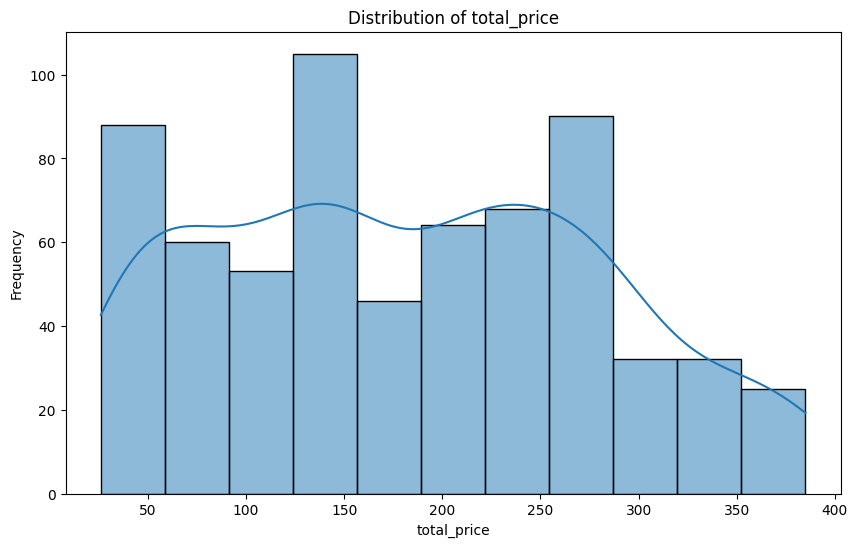

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_dataset['total_price'], kde=True)
plt.title('Distribution of total_price')
plt.xlabel('total_price')
plt.ylabel('Frequency')
plt.show()

### Sales Performance

In [31]:
total_sales = filtered_dataset['total_price'].sum()
average_sales = filtered_dataset['total_price'].mean()
total_quantity_sold = filtered_dataset['quantity_sold'].sum()

print(f"Total Sales: {total_sales}")
print(f"Average Sales: {average_sales}")
print(f"Total Quantity Sold: {total_quantity_sold}")

Total Sales: 121764.0
Average Sales: 183.65610859728505
Total Quantity Sold: 3993


### Calculating total revenue for each product
Top performing Item: **I00177**

  Item Key  Total Revenue
0   I00181        51974.0
1   I00177        69790.0


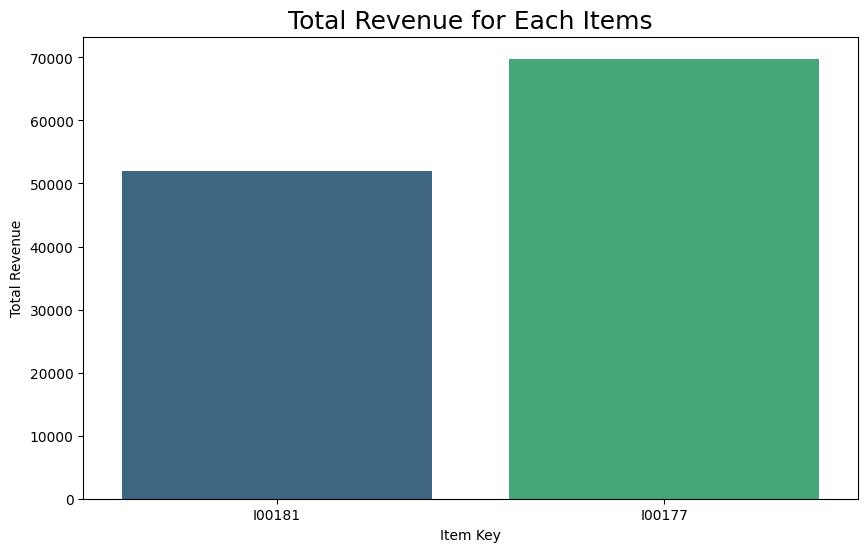

In [32]:
I00181_total_rev = filtered_dataset[filtered_dataset['item_key'] == 'I00181']['total_price'].sum()
I00177_total_rev = filtered_dataset[filtered_dataset['item_key'] == 'I00177']['total_price'].sum()
data = {
    'Item Key': ['I00181', 'I00177'],
    'Total Revenue': [I00181_total_rev, I00177_total_rev]
}
df = pd.DataFrame(data)
print(df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Item Key',
            y='Total Revenue',
            data=df,
            palette='viridis')
plt.title('Total Revenue for Each Items', fontsize = 18)
plt.xlabel('Item Key')
plt.ylabel('Total Revenue')
plt.show()

### Find out the total revenue by month of a specific year
- In 2020, we have best revenue on November, December


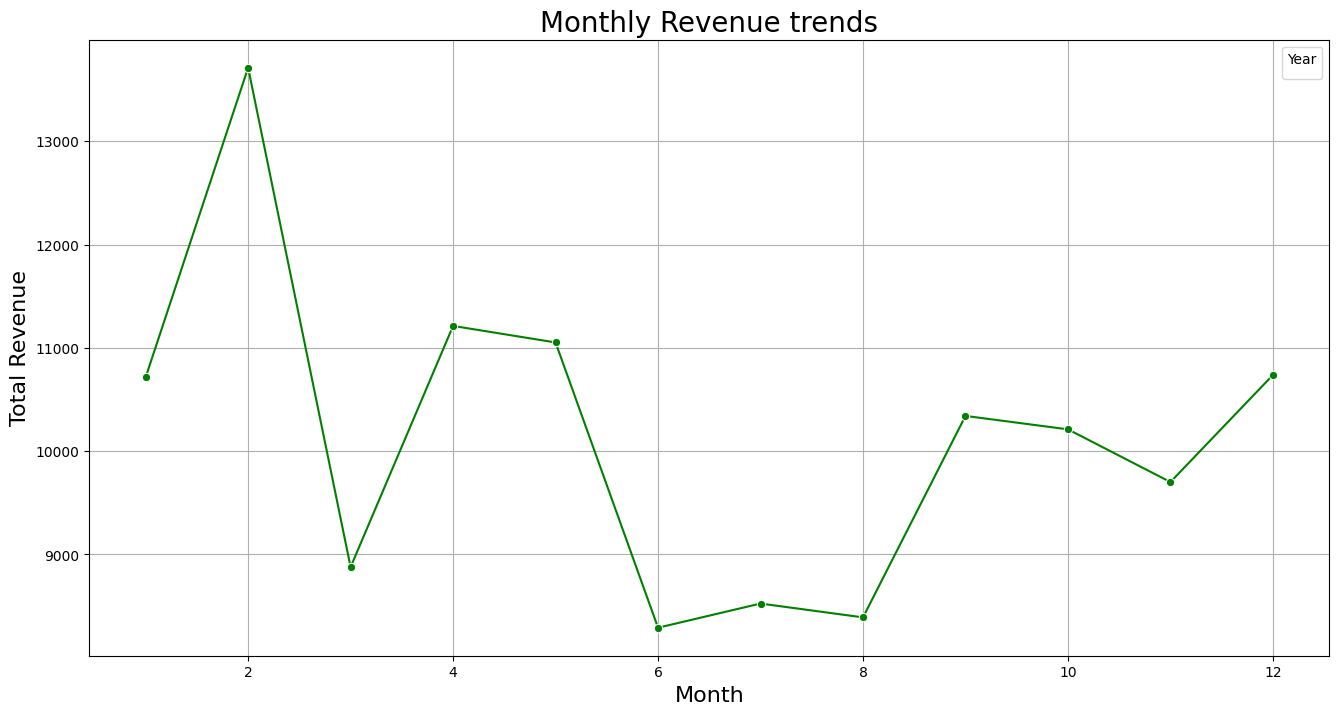

In [46]:
# Calculate total revenue by month of a specific year
rev_data1 = filtered_dataset.groupby(['month'])['total_price'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(16, 8))
sns.lineplot(x='month', y='total_price', data=rev_data1, marker='o', color='green')
plt.title('Monthly Revenue trends', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Revenue', fontsize=16)
plt.legend(title='Year')
plt.grid()
plt.show()

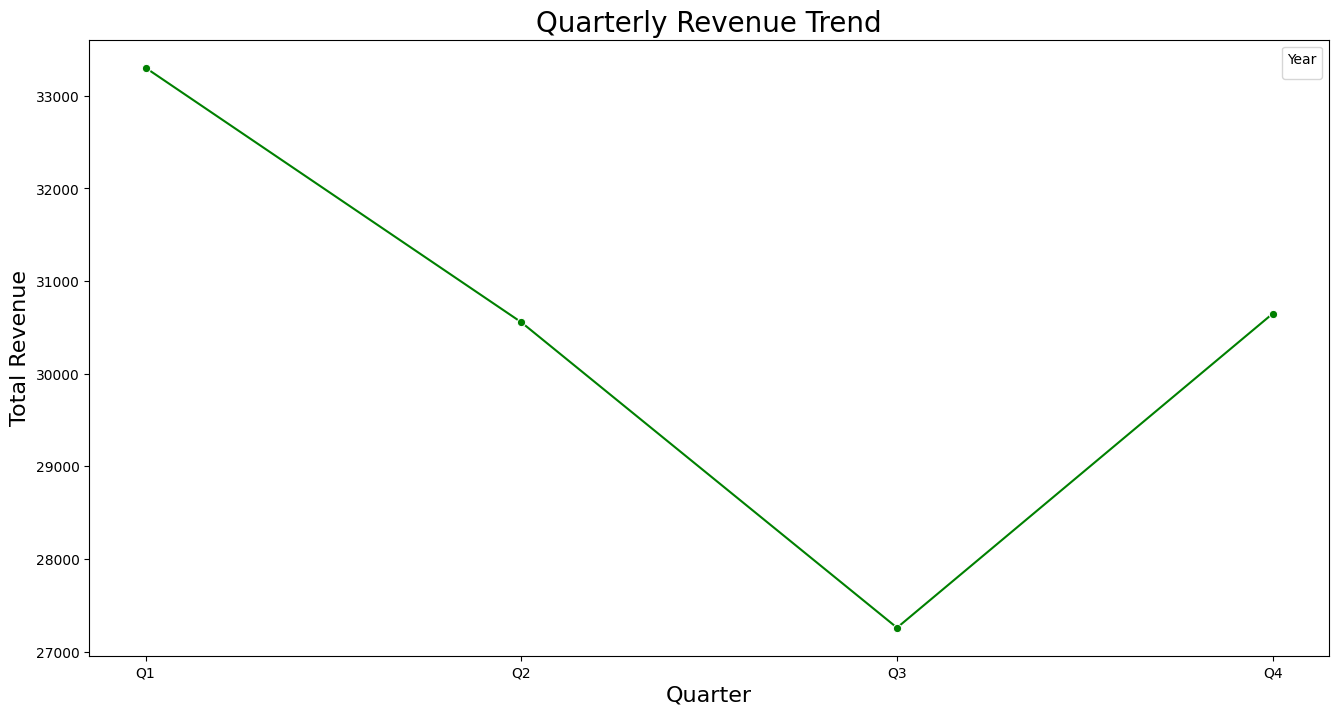

In [ ]:
# Calculate total revenue trend by Quarterly
rev_data1 = filtered_dataset.groupby(['quarter'])['total_price'].sum().reset_index()

# Plot Quarterly sales trend
plt.figure(figsize=(16, 8))
sns.lineplot(x='quarter', y='total_price', data=rev_data1, marker='o', color='green')
plt.title('Quarterly Revenue Trend', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Total Revenue', fontsize=16)
plt.legend(title='Year')
plt.show()


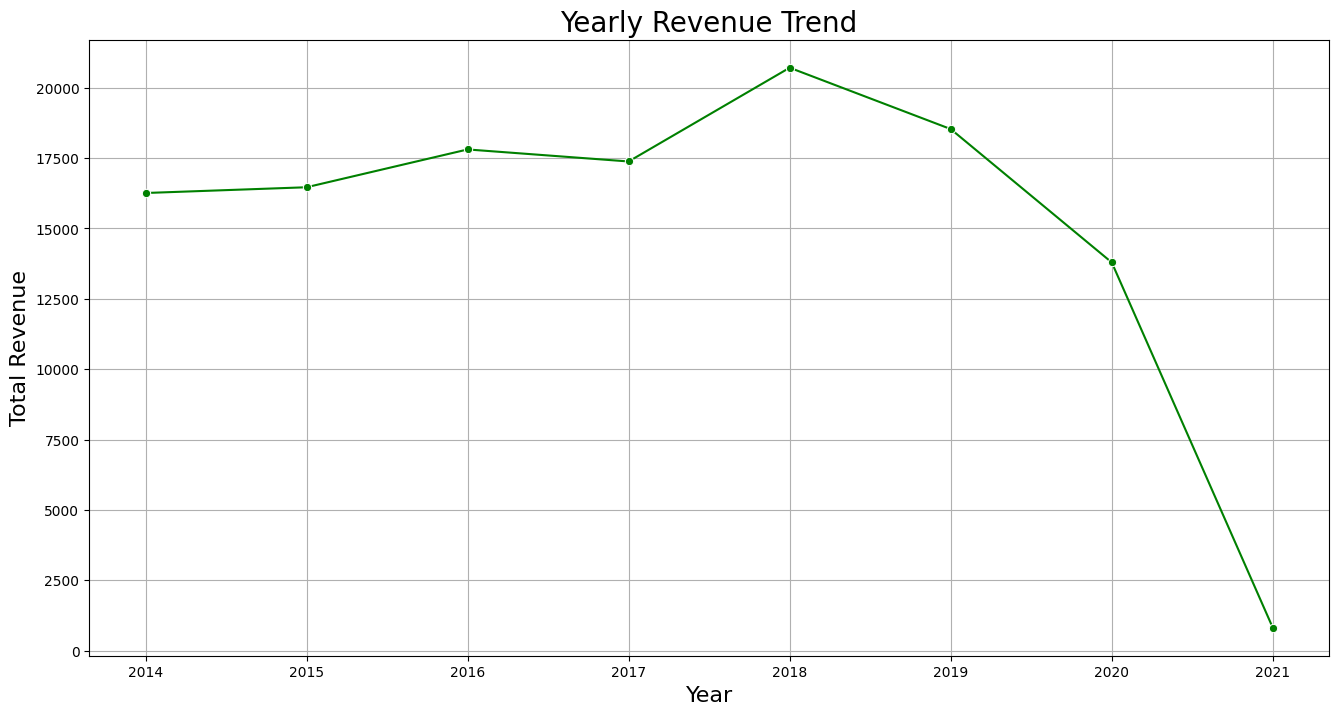

In [39]:
# Calculate total revenue trend by Yearly
yearly_revenue = filtered_dataset.groupby('year')['total_price'].sum().reset_index()

# Plot yearly revenue trend
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='total_price', data=yearly_revenue, marker='o', color='green')
plt.title('Yearly Revenue Trend', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Revenue', fontsize=16)
plt.grid(True)
plt.show()

### Unit Sales Trend Over the Years
- Best Year for I00177: 2016
- Bad year for I00177: 2020
--------------------------------------
- Best Year for I00181: 2018
- Bad year for I00181: 2016

item_key  I00177  I00181
year                    
2014         264     270
2015         252     294
2016         225     382
2017         270     305
2018         380     285
2019         317     286
2020         276     159
2021          10      18


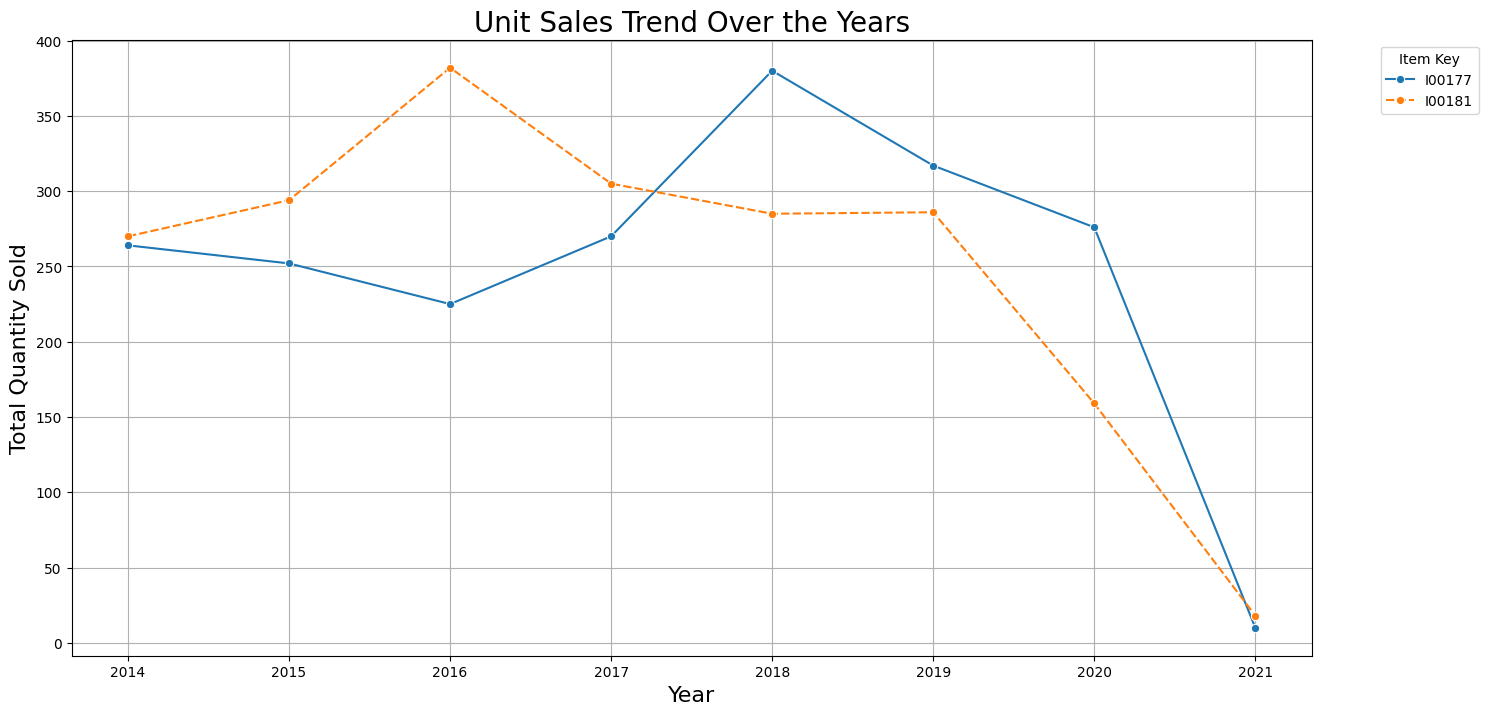

In [ ]:
unit_sales_trend = filtered_dataset.groupby(['year', 'item_key'])['quantity_sold'].sum().reset_index()
unit_sales_trend_years = unit_sales_trend.pivot(index='item_key', columns='year', values='quantity_sold').fillna(0)
print(unit_sales_trend_years.T)
plt.figure(figsize=(16, 8))
sns.lineplot(data=unit_sales_trend_years.T, marker='o')
plt.title('Unit Sales Trend Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Quantity Sold', fontsize=16)
plt.legend(title='Item Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Sales by store size
- Most sales by store size: Large
- Underperforming store size: Medium

  store_size  total_price
0      large      48065.0
1     medium      34565.0
2      small      39134.0


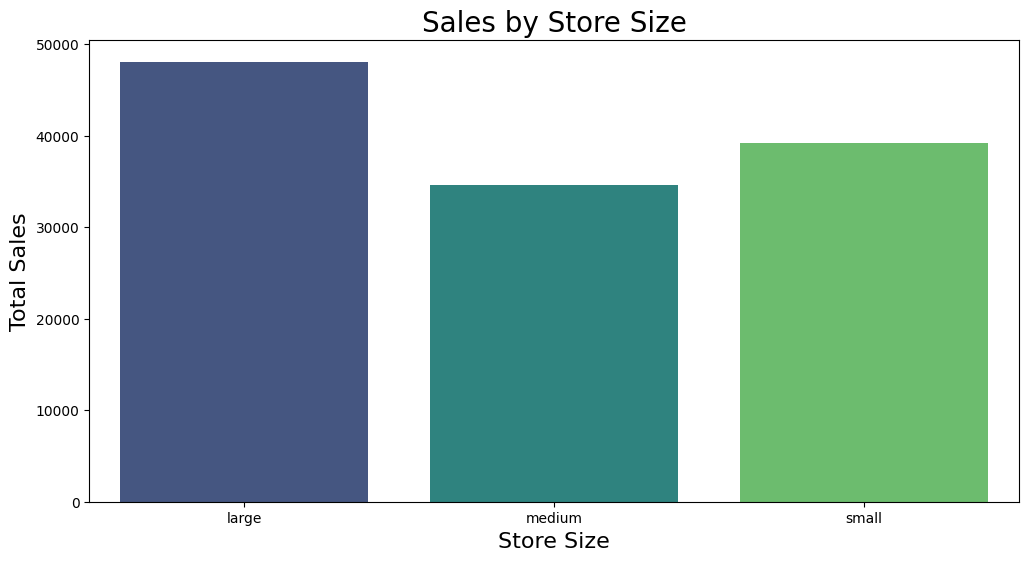

In [ ]:
sales_by_store_size = filtered_dataset.groupby('store_size')['total_price'].sum().reset_index()
print(sales_by_store_size)
plt.figure(figsize=(12, 6))
sns.barplot(x='store_size', y='total_price', data=sales_by_store_size, palette='viridis')
plt.title('Sales by Store Size', fontsize=20)
plt.xlabel('Store Size', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.show()

### Sales distribution by division
- Most sales generated in: Dhaka
- Lowest sales generated in: Barishal

   division_x  total_price
0    Barishal       4611.0
1  Chittagong      18739.0
2       Dhaka      93554.0
3      Sylhet       4860.0


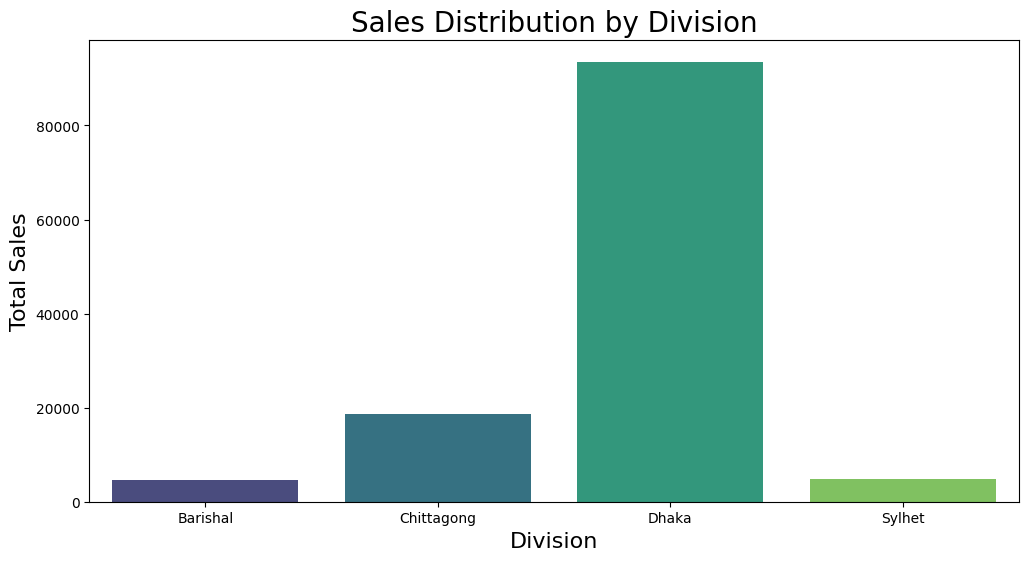

In [ ]:
sales_by_division = filtered_dataset.groupby('division_x')['total_price'].sum().reset_index()
print(sales_by_division)
plt.figure(figsize=(12, 6))
sns.barplot(x='division_x', y='total_price', data=sales_by_division, palette='viridis')
plt.title('Sales Distribution by Division', fontsize=20)
plt.xlabel('Division', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.show()

### Monthly sales trends
- Best month for sales: February
- Bad month for sales: June

    month  total_price
0       1      10714.0
1       2      13711.0
2       3       8878.0
3       4      11212.0
4       5      11052.0
5       6       8291.0
6       7       8525.0
7       8       8391.0
8       9      10341.0
9      10      10211.0
10     11       9701.0
11     12      10737.0


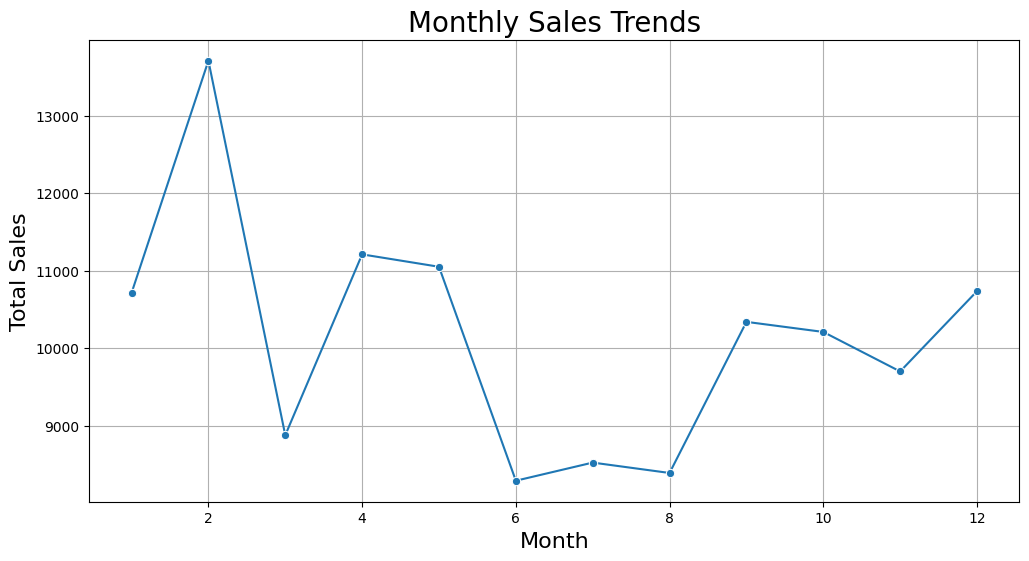

In [ ]:
monthly_sales = filtered_dataset.groupby('month')['total_price'].sum().reset_index()
print(monthly_sales)
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_price', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.show()

### Quarterly sales trends
- Best quarter for sales: Q1
- Bad quarter for sales: Q3

  quarter  total_price
0      Q1      33303.0
1      Q2      30555.0
2      Q3      27257.0
3      Q4      30649.0


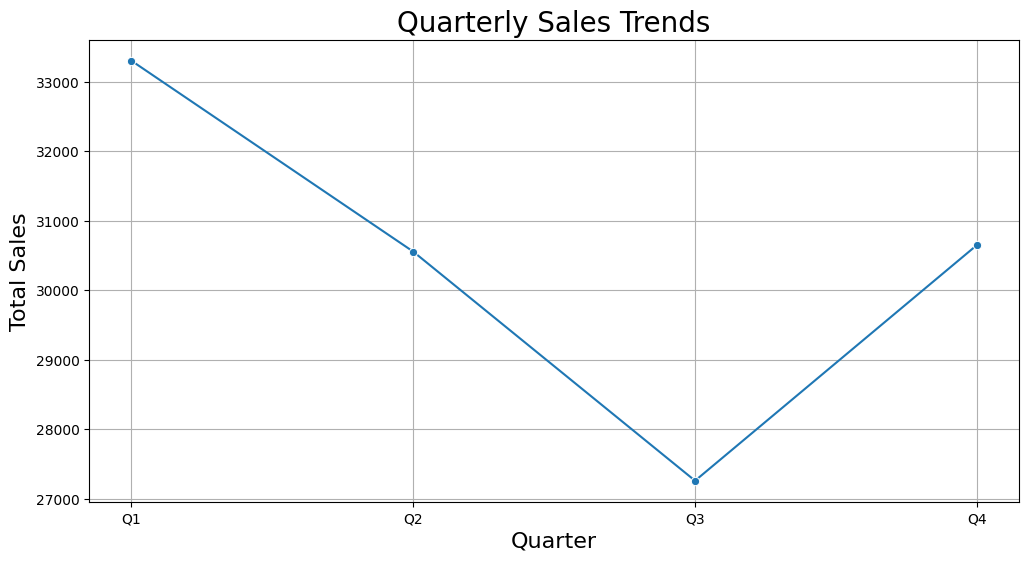

In [ ]:
quarterly_sales = filtered_dataset.groupby('quarter')['total_price'].sum().reset_index()
print(quarterly_sales)
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter', y='total_price', data= quarterly_sales, marker='o')
plt.title('Quarterly Sales Trends', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.show()

### Yearly sales trend
- Best year in terms of sales: 2018
- Worst year in terms of sales: 2020

   year  total_price
0  2014      16260.0
1  2015      16464.0
2  2016      17807.0
3  2017      17380.0
4  2018      20710.0
5  2019      18531.0
6  2020      13794.0
7  2021        818.0


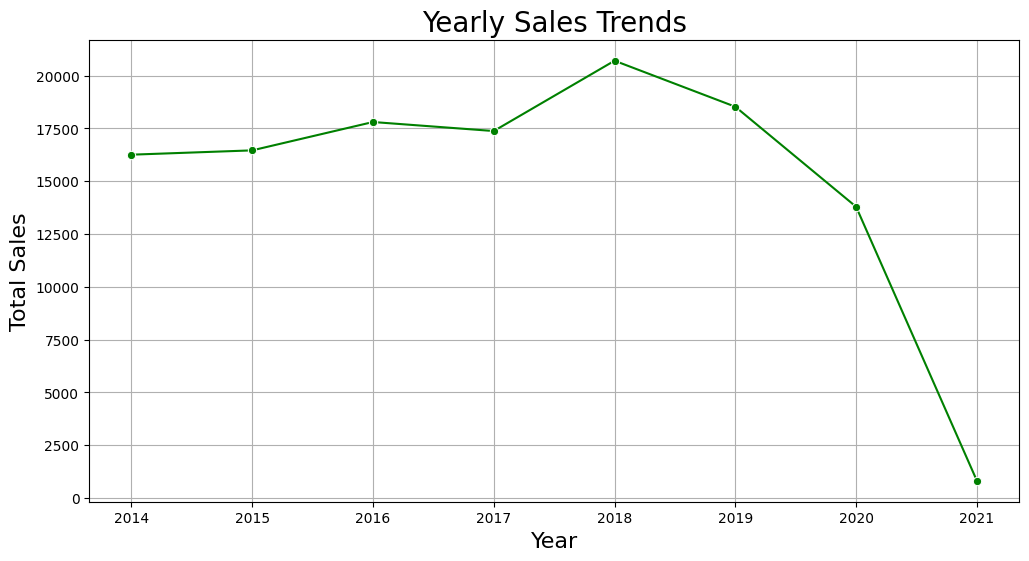

In [ ]:
yearly_sale = filtered_dataset.groupby('year')['total_price'].sum().reset_index()
print(yearly_sale)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_price', data= yearly_sale, marker='o', color = 'green')
plt.title('Yearly Sales Trends', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.show()

### Customer distribution by district
- Best district in terms of customer distribution: Dhaka
- Underperforming district in terms of customer distribution: Barishal

  district_x  customer_key
0    B.Baria            29
1   Barishal            26
2    Chadpur            29
3    Comilla            34
4      Dhaka           480
5    Gazipur            35
6     Sylhet            30


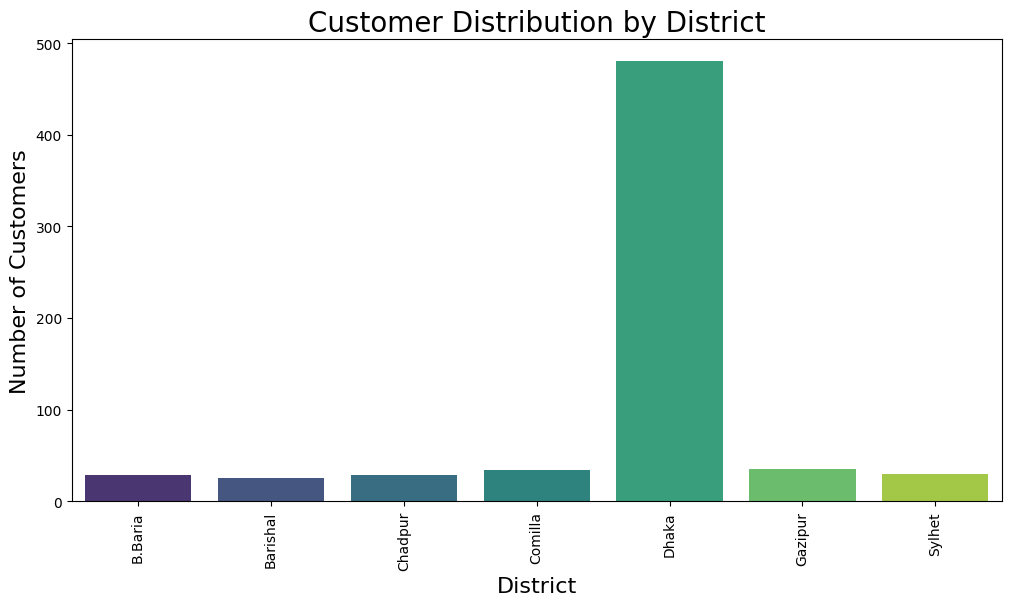

In [ ]:
customer_distribution = filtered_dataset.groupby('district_x')['customer_key'].count().reset_index()
print(customer_distribution)
plt.figure(figsize=(12, 6))
sns.barplot(x='district_x', y='customer_key', data=customer_distribution, palette='viridis')
plt.title('Customer Distribution by District', fontsize=20)
plt.xlabel('District', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Total revenue by division
- Best district in terms of revenue: Dhaka
- Underperforming district in terms of revenue: Barishal

   division_x  total_price
0    Barishal       4611.0
1  Chittagong      18739.0
2       Dhaka      93554.0
3      Sylhet       4860.0


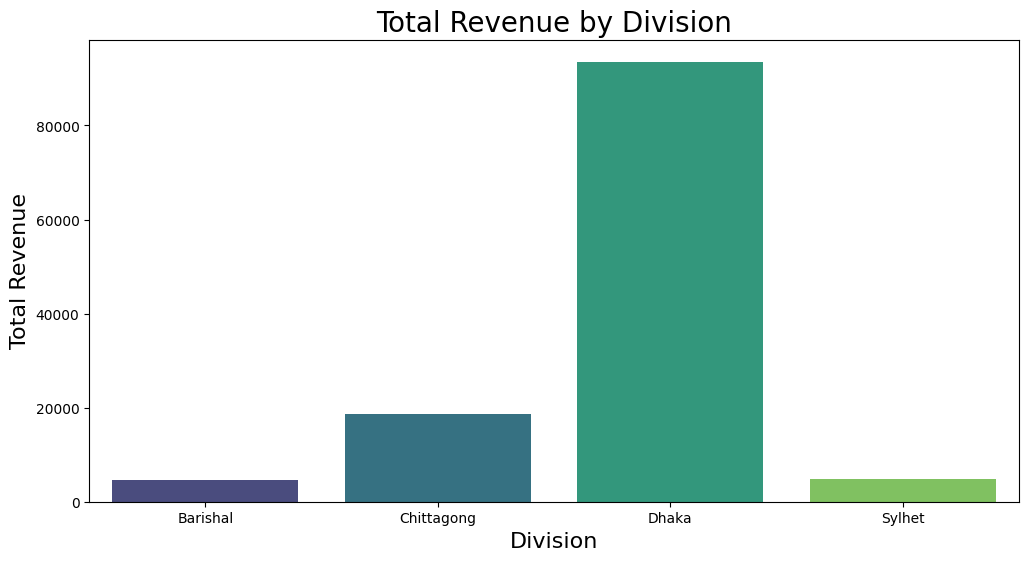

In [ ]:
total_revenue_by_division = filtered_dataset.groupby('division_x')['total_price'].sum().reset_index()
print(total_revenue_by_division)

plt.figure(figsize=(12, 6))
sns.barplot(x='division_x', y='total_price', data=total_revenue_by_division, palette='viridis')
plt.title('Total Revenue by Division', fontsize=20)
plt.xlabel('Division', fontsize=16)
plt.ylabel('Total Revenue', fontsize=16)
# plt.xticks(rotation=45)
plt.show()

### Find the store_size-wise quarterly total sales price of all stores
**Q1:**
- Best: Small ,Large
- Underperforming: Medium

**Q2:**
- Best: Large
- Underperforming: Medium

**Q2:**
- Best: Large
- Underperforming: Medium


this is avg total price data: 
    quarter store_size  total_price
0       Q1      large      12073.0
1       Q1     medium       9107.0
2       Q1      small      12123.0
3       Q2      large      12093.0
4       Q2     medium       8763.0
5       Q2      small       9699.0
6       Q3      large       9739.0
7       Q3     medium       9359.0
8       Q3      small       8159.0
9       Q4      large      14160.0
10      Q4     medium       7336.0
11      Q4      small       9153.0


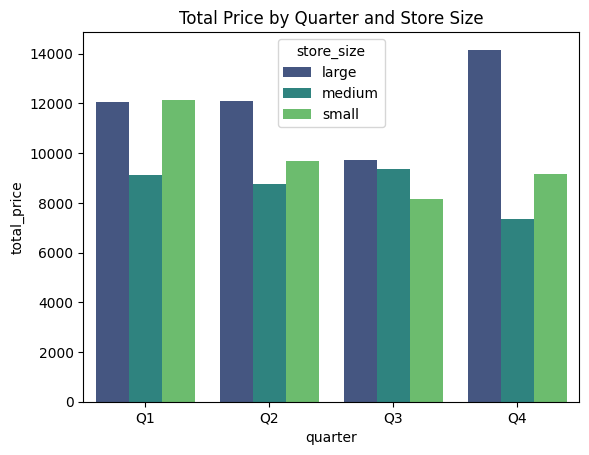

In [ ]:
mask_1 = filtered_dataset.groupby(['quarter', 'store_size'])['total_price'].sum().reset_index()
print(f'this is avg total price data: \n {mask_1}')

sns.barplot(x='quarter',
            y='total_price',
            hue='store_size',
            data=mask_1,
            palette= 'viridis')
plt.title('Total Price by Quarter and Store Size')
plt.show()

### Year wise customer engagement for each division
**2014**
- Best Division: Barishal
- Underperforming: Rangpur

**2015**
- Best Division: Chitagong
- Underperforming: Rangpur

**2016**
- Best Division: Khulna
- Underperforming: Barishal

**2017**
- Best Division: Rangpur
- Underperforming: Sylhet

**2018**
- Best Division: Dhaka
- Underperforming: Chitagong

**2019**
- Best Division: Sylhet
- Underperforming: Barishal

**2020**
- Best Division: Barishal
- Underperforming: Dhaka

    year  division_y  customer_key
0   2014    Barishal         89462
1   2014  Chittagong         41995
2   2014       Dhaka         27608
3   2014      Khulna         56243
4   2014  Mymensingh         53136
5   2014    Rajshahi         48113
6   2014     Rangpur         19042
7   2014      Sylhet         52862
8   2015    Barishal         18105
9   2015  Chittagong         91934
10  2015       Dhaka         70286
11  2015      Khulna         65885
12  2015  Mymensingh         45289
13  2015    Rajshahi         68762
14  2015     Rangpur          6073
15  2015      Sylhet         47097
16  2016    Barishal          1049
17  2016  Chittagong         83376
18  2016       Dhaka         34683
19  2016      Khulna         91548
20  2016  Mymensingh         18937
21  2016    Rajshahi         22034
22  2016     Rangpur         88080
23  2016      Sylhet         78140
24  2017    Barishal         22945
25  2017  Chittagong         85200
26  2017       Dhaka         35382
27  2017      Khulna

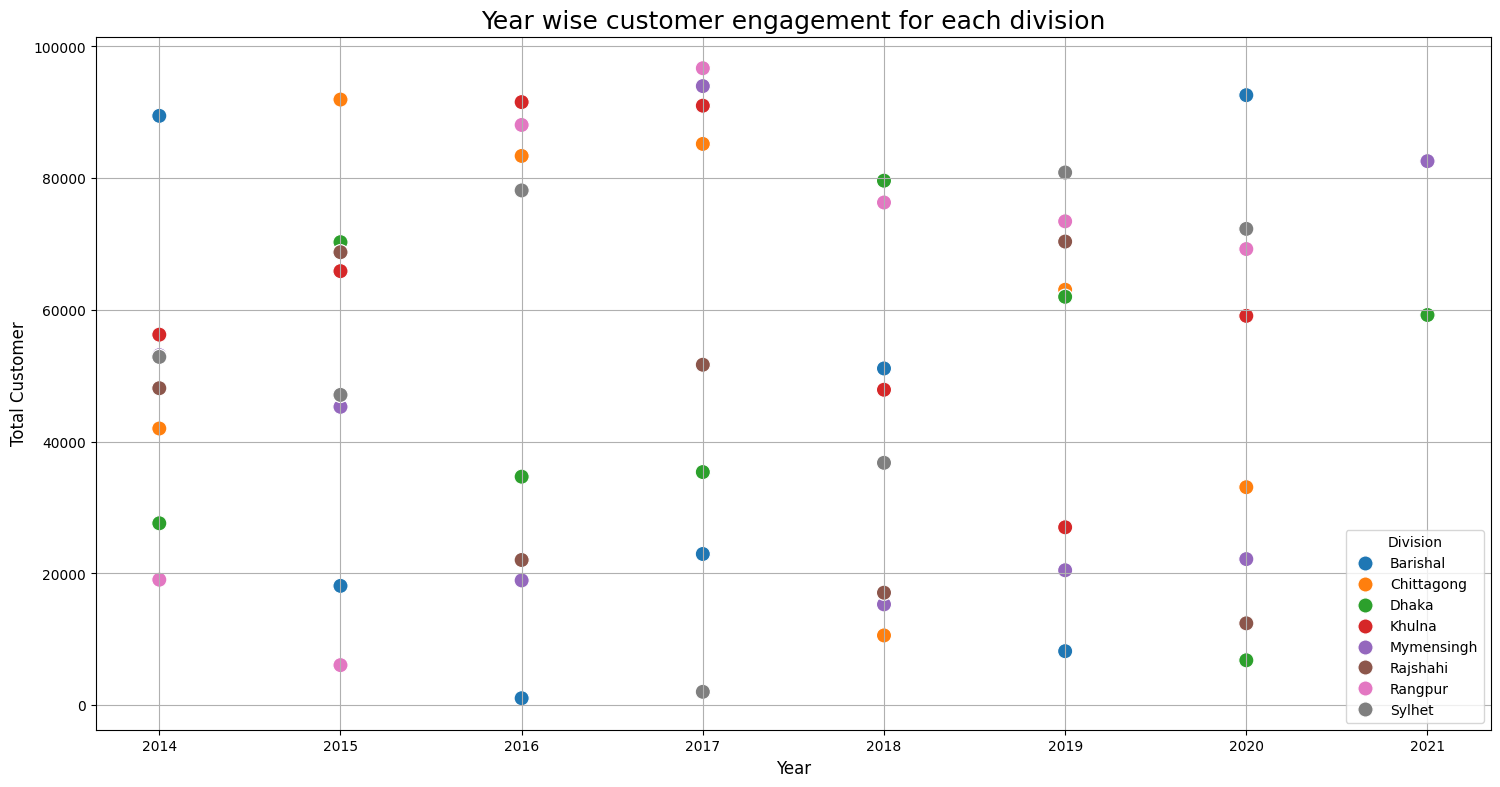

In [ ]:

yearly_custo_num = filtered_dataset.groupby(['year', 'division_y'], as_index=False)['customer_key'].idxmax()
print(yearly_custo_num)
plt.figure(figsize=(18, 9))
sns.scatterplot(
    data=yearly_custo_num, 
    x='year',
    y='customer_key', 
    hue='division_y', 
    palette='tab10', 
    s=120
)

plt.title('Year wise customer engagement for each division', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Customer', fontsize=12)
plt.legend(title='Division')
plt.grid()
plt.show()

### Find out top 10 customer based on the total transaction
C000587 =           266.833333

C002435 =           262.750000

C005221 =           222.300000

C004795 =           208.750000

C002068 =           207.888889

C006063 =           205.500000

C004118 =           205.285714

C003519 =           201.800000

C001461 =           200.083333

C007825 =           199.055556

     Customer Segment  Average Total Price
586           C000587           266.833333
2434          C002435           262.750000
5219          C005221           222.300000
4793          C004795           208.750000
2067          C002068           207.888889
6061          C006063           205.500000
4117          C004118           205.285714
3518          C003519           201.800000
1460          C001461           200.083333
7823          C007825           199.055556


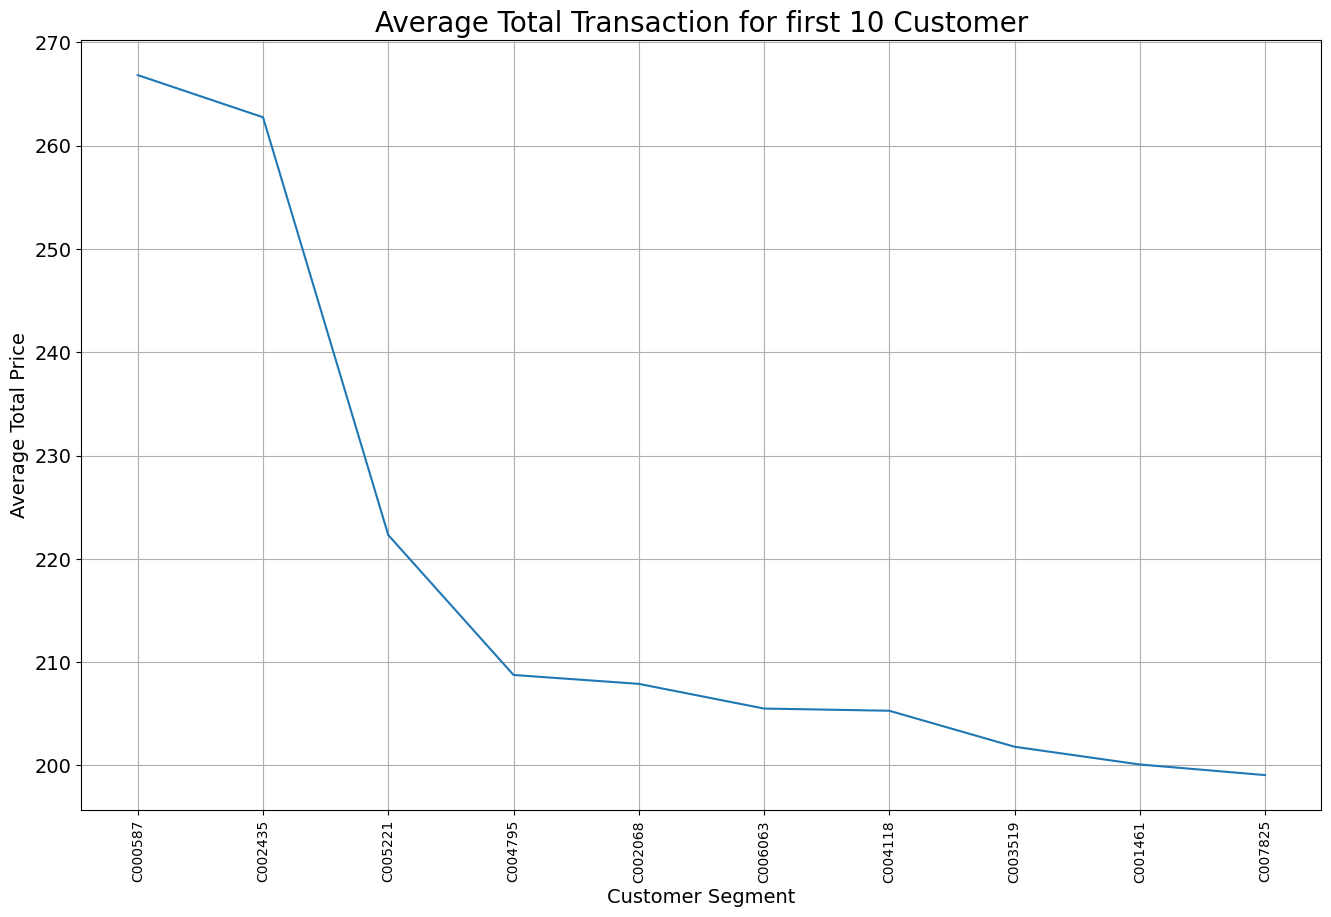

In [ ]:
x = fact_trans_item_cust_time_store[['customer_key', 'total_price']]
avg = x.groupby('customer_key')['total_price'].mean().reset_index()
avg.columns = ['Customer Segment', 'Average Total Price']
y = avg.sort_values(by='Average Total Price', ascending= False).iloc[:10]
print(y)
plt.figure(figsize=(16,10))
sns.lineplot(x='Customer Segment',
             y='Average Total Price',
             data=y,
             )
plt.title('Average Total Transaction for first 10 Customer', fontsize=20)
plt.xlabel('Customer Segment', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Average Total Price', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### What is the total revenue generated by each store?
**Top 5 most revenue generated store:**
   store_key  total_price

S0039=       6409.0

S0024=       5065.0

S0012=       4551.0

S0035=       4327.0

S0017=       4279.0

   store_key  total_price
38     S0039       6409.0
23     S0024       5065.0
11     S0012       4551.0
34     S0035       4327.0
16     S0017       4279.0


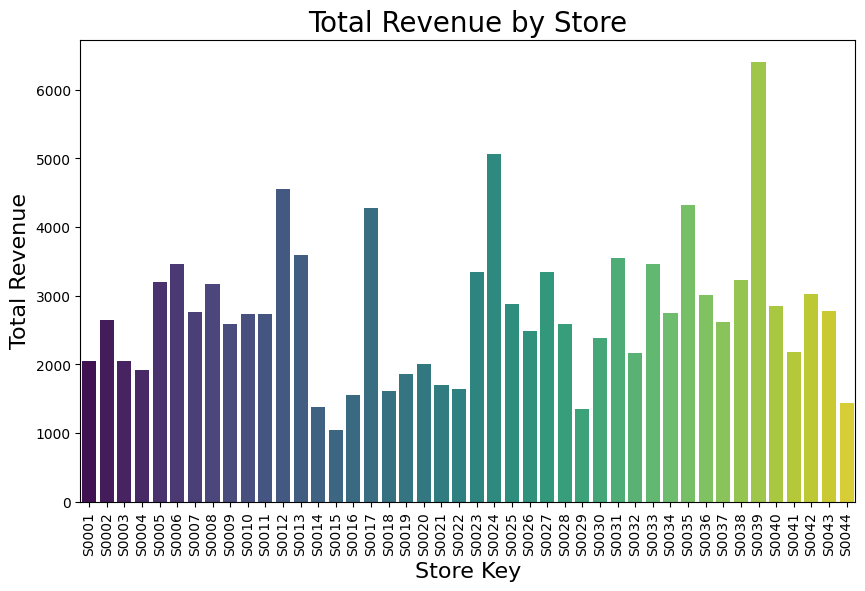

In [ ]:
store_rev = filtered_dataset[['store_key', 'total_price']]
store_rev_data = store_rev.groupby('store_key')['total_price'].sum().reset_index()
print(store_rev_data.sort_values(by= 'total_price', ascending= False).head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x='store_key',
            y='total_price',
            data=store_rev_data,
            hue='store_key',
            palette='viridis',
            )

plt.title('Total Revenue by Store', fontsize = 20)
plt.xlabel('Store Key', fontsize = 16)
plt.ylabel('Total Revenue', fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### Average Revenue per Division
Division  Average Total Price

Chittagong=           203.684783

Dhaka=           181.658252

Barishal=           177.346154

Sylhet=           162.000000


     Division  Average Total Price
1  Chittagong           203.684783
2       Dhaka           181.658252
0    Barishal           177.346154
3      Sylhet           162.000000


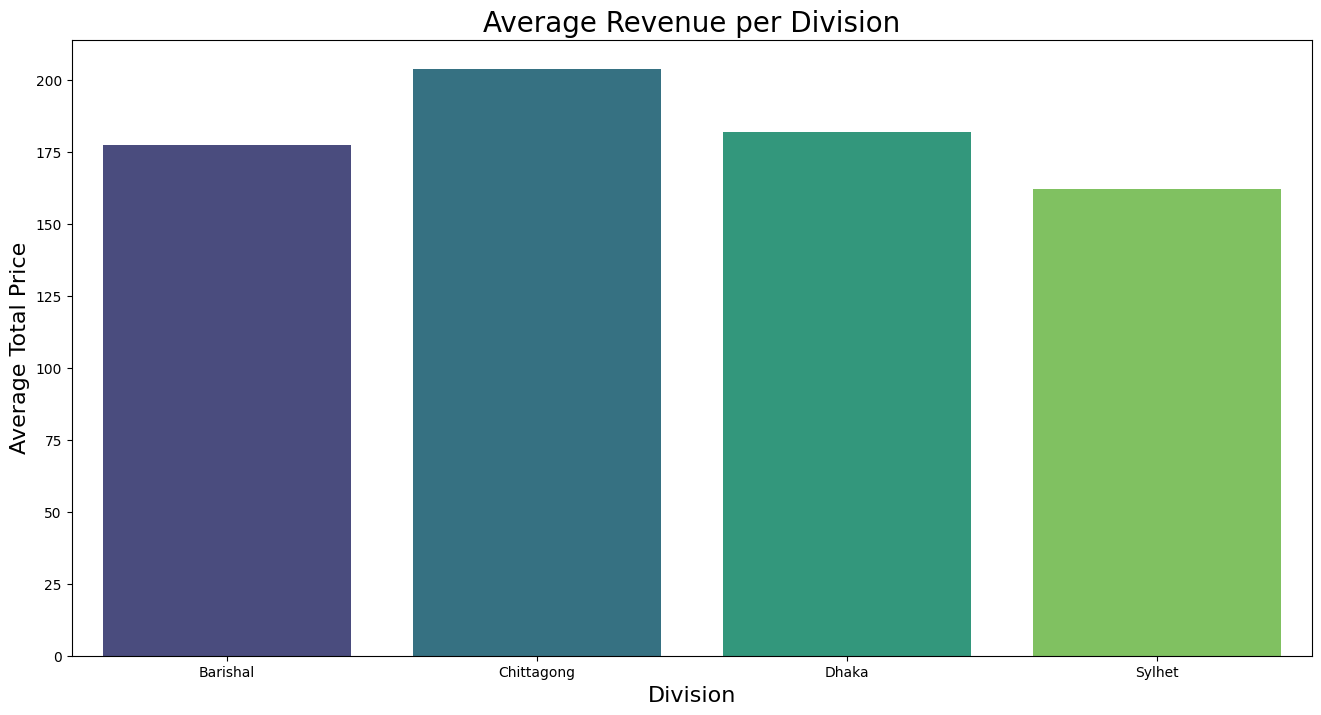

In [ ]:
avg_price_div = filtered_dataset.groupby('division_x')['total_price'].mean().reset_index()
avg_price_div.columns = ['Division', 'Average Total Price']
print(avg_price_div.sort_values(by= 'Average Total Price', ascending= False))

plt.figure(figsize=(16, 8))
sns.barplot(x='Division',
            y='Average Total Price',
            data=avg_price_div,
            palette='viridis')
plt.title('Average Revenue per Division', fontsize=20)
plt.xlabel('Division', fontsize=16)
plt.ylabel('Average Total Price', fontsize=16)
plt.show()

**Best Performing Store:**

store_key  -   total_price - quantity_sold                            

S0039     -      6409.0     -       206

S0024     -      5065.0     -       164

S0012     -      4551.0     -       147

S0035     -      4327.0     -       137

S0017    -       4279.0     -       140

----------------------------------------------

**Worst Performing Store:**

store_key  -  total_price  -  quantity_sold
                           
S0015     -      1050.0      -       30

S0029     -      1348.0      -       47

S0014     -      1376.0      -       46

S0044     -      1431.0     -        45

S0016    -       1560.0     -        51

In [ ]:
best_performing_store = filtered_dataset.groupby('store_key').agg({'total_price': 'sum', 'quantity_sold': 'sum'}).sort_values(by='total_price', ascending=False).head(5)
worst_performing_store = filtered_dataset.groupby('store_key').agg({'total_price': 'sum', 'quantity_sold': 'sum'}).sort_values(by='total_price', ascending=True).head(5)

print("Best Performing Store:")
print(best_performing_store)
print("**" * 20)
print("Worst Performing Store:")
print(worst_performing_store)


Best Performing Store:
           total_price  quantity_sold
store_key                            
S0039           6409.0            206
S0024           5065.0            164
S0012           4551.0            147
S0035           4327.0            137
S0017           4279.0            140
****************************************
Worst Performing Store:
           total_price  quantity_sold
store_key                            
S0015           1050.0             30
S0029           1348.0             47
S0014           1376.0             46
S0044           1431.0             45
S0016           1560.0             51


## Prescriptive Analysis

Mean Absolute Error: 27.84361384820898
Mean Squared Error: 981.4425924577711
R^2 Score: 90.44204203896496


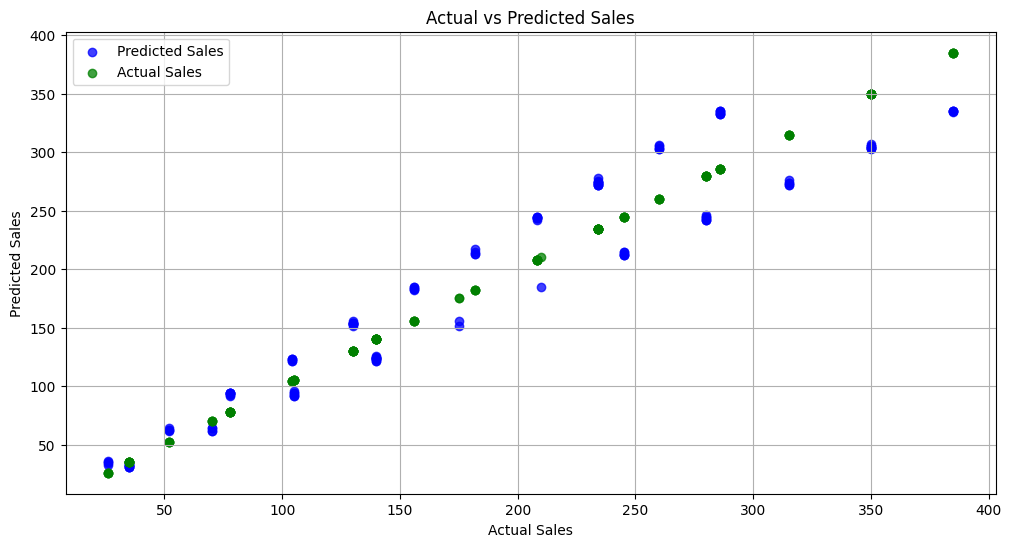

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step-1: Prepare the data
X = filtered_dataset[['store_size', 'division_x', 'item_type', 'quantity_sold']]
y = filtered_dataset['total_price']


lb_encoders = {}
label_cols = ['store_size', 'division_x', 'item_type']

for i in label_cols:
    lb_encoders[i] = LabelEncoder()
    X[i] = lb_encoders[i].fit_transform(X[i])

# Step-2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step-3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step-4: Make predictions
y_pred = model.predict(X_test)

# Step-5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2 * 100}')

# Step-6: Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted Sales')
plt.scatter(y_test, y_test, alpha=0.75, color='green', label='Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
type_encoder = lb_encoders['item_type']
type_encoder_mapping = dict(zip(type_encoder.classes_, type_encoder.transform(type_encoder.classes_)))
print(type_encoder_mapping)

{'Food - Chocolate': 0}


In [ ]:
div_encoder = lb_encoders['division_x']
div_encoder_mapping = dict(zip(div_encoder.classes_, div_encoder.transform(div_encoder.classes_)))
print(div_encoder_mapping)

{'Barishal': 0, 'Chittagong': 1, 'Dhaka': 2, 'Sylhet': 3}


In [ ]:
store_size_encoder = lb_encoders['store_size']
store_size_mapping = dict(zip(store_size_encoder.classes_, store_size_encoder.transform(store_size_encoder.classes_)))
print(store_size_mapping)

{'large': 0, 'medium': 1, 'small': 2}


In [ ]:
X.head(5)

,store_size,division_x,item_type,quantity_sold
315,2,2,0,8
420,1,2,0,7
758,1,2,0,4
1049,2,2,0,8
1052,1,2,0,5


In [ ]:
target_revenue = 70000

store_sizes = lb_encoders['store_size'].classes_
divisions = lb_encoders['division_x'].classes_
item_types = lb_encoders['item_type'].classes_

best_combination = None
best_revenue_diff = float('inf')

for store_size in store_sizes:
    for division in divisions:
        for item_type in item_types:
            desired_features = pd.DataFrame({
                'store_size': [lb_encoders['store_size'].transform([store_size])[0]],
                'division_x': [lb_encoders['division_x'].transform([division])[0]],
                'item_type': [lb_encoders['item_type'].transform([item_type])[0]],
                'quantity_sold': [1]
            })

            predicted_revenue = model.predict(desired_features)
            desired_features['quantity_sold'] = target_revenue / predicted_revenue
            final_predicted_revenue = model.predict(desired_features)
            revenue_diff = abs(target_revenue - final_predicted_revenue[0])
            if revenue_diff < best_revenue_diff:
                best_revenue_diff = revenue_diff
                best_combination = {
                    'store_size': store_size,
                    'division': division,
                    'item_type': item_type,
                    'quantity_sold': desired_features['quantity_sold'].values[0],
                    'predicted_revenue': final_predicted_revenue[0]
                }

print(f'Best Combination to Achieve Target Revenue of {target_revenue}:')
print(f'Store Size: {best_combination["store_size"]}')
print(f'Division: {best_combination["division"]}')
print(f'Item Type: {best_combination["item_type"]}')
print(f'Quantity Sold: {best_combination["quantity_sold"]}')
print(f'Predicted Revenue: {best_combination["predicted_revenue"]}')

Best Combination to Achieve Target Revenue of 70000:
Store Size: small
Division: Sylhet
Item Type: Food - Chocolate
Quantity Sold: 2355.814878453405
Predicted Revenue: 70949.87596469214


## Predicting Demand for Inventory Management

In [ ]:
filtered_dataset['date']


315      13-12-2014 14:05
420      01-02-2018 23:29
758      02-08-2019 13:07
1049     31-12-2016 19:59
1052     02-09-2015 00:59
               ...       
98693    11-06-2020 11:44
98800    30-04-2015 14:42
99012    23-01-2018 03:40
99216    14-04-2018 19:53
99679    12-05-2014 21:33
Name: date, Length: 663, dtype: object

In [ ]:
# Convert the 'date' column to datetime format
filtered_dataset['date'] = pd.to_datetime(filtered_dataset['date'])
filtered_dataset['date'] = filtered_dataset['date'].dt.date
filtered_dataset['date']

315      2014-12-13
420      2018-02-01
758      2019-08-02
1049     2016-12-31
1052     2015-09-02
            ...    
98693    2020-06-11
98800    2015-04-30
99012    2018-01-23
99216    2018-04-14
99679    2014-05-12
Name: date, Length: 663, dtype: object

### Quantity prediction

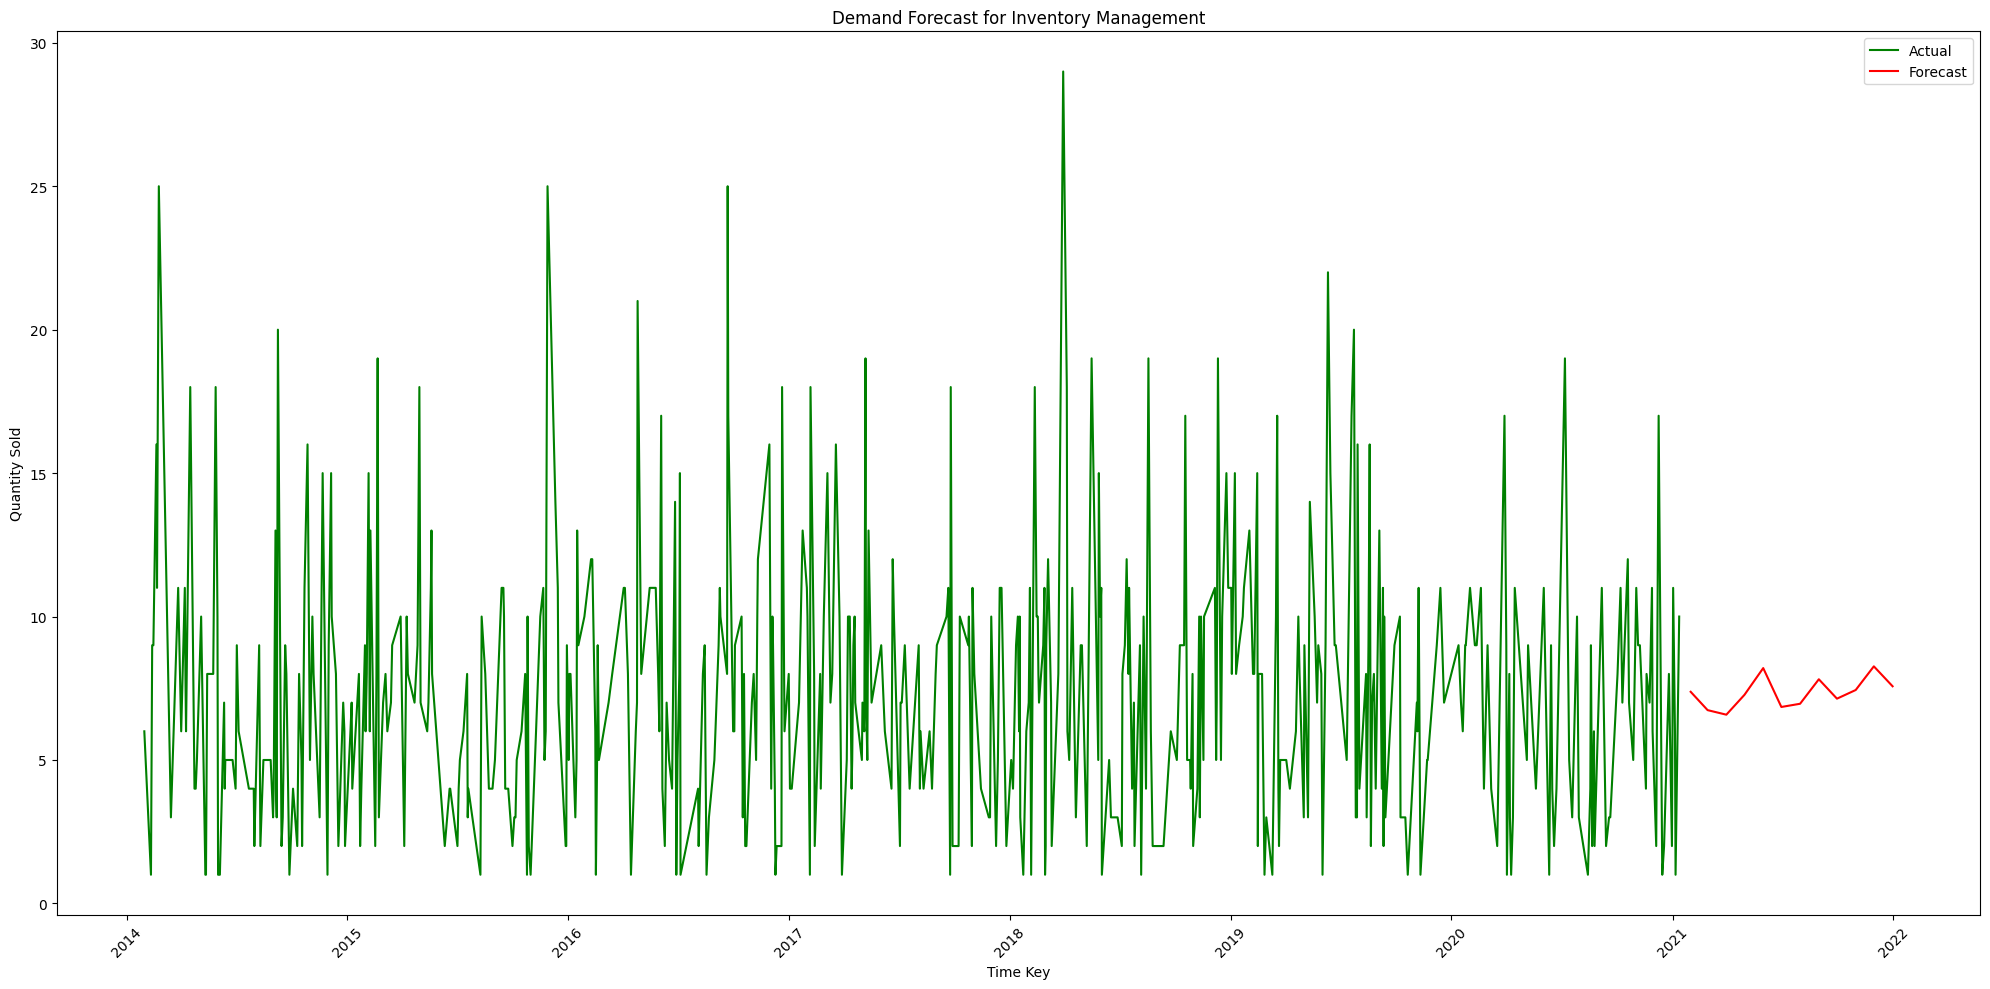

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

time_series_data = filtered_dataset.groupby('date')['quantity_sold'].sum().reset_index()
time_series_data['date'] = pd.to_datetime(time_series_data['date'])

model = ExponentialSmoothing(time_series_data['quantity_sold'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.forecast(steps=12)
forecast_index = pd.date_range(start=time_series_data['date'].iloc[-1], periods=12, freq='M')

plt.figure(figsize=(20, 10))
plt.plot(time_series_data['date'], time_series_data['quantity_sold'], label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Demand Forecast for Inventory Management')
plt.xlabel('Time Key')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Revenue Forecasting

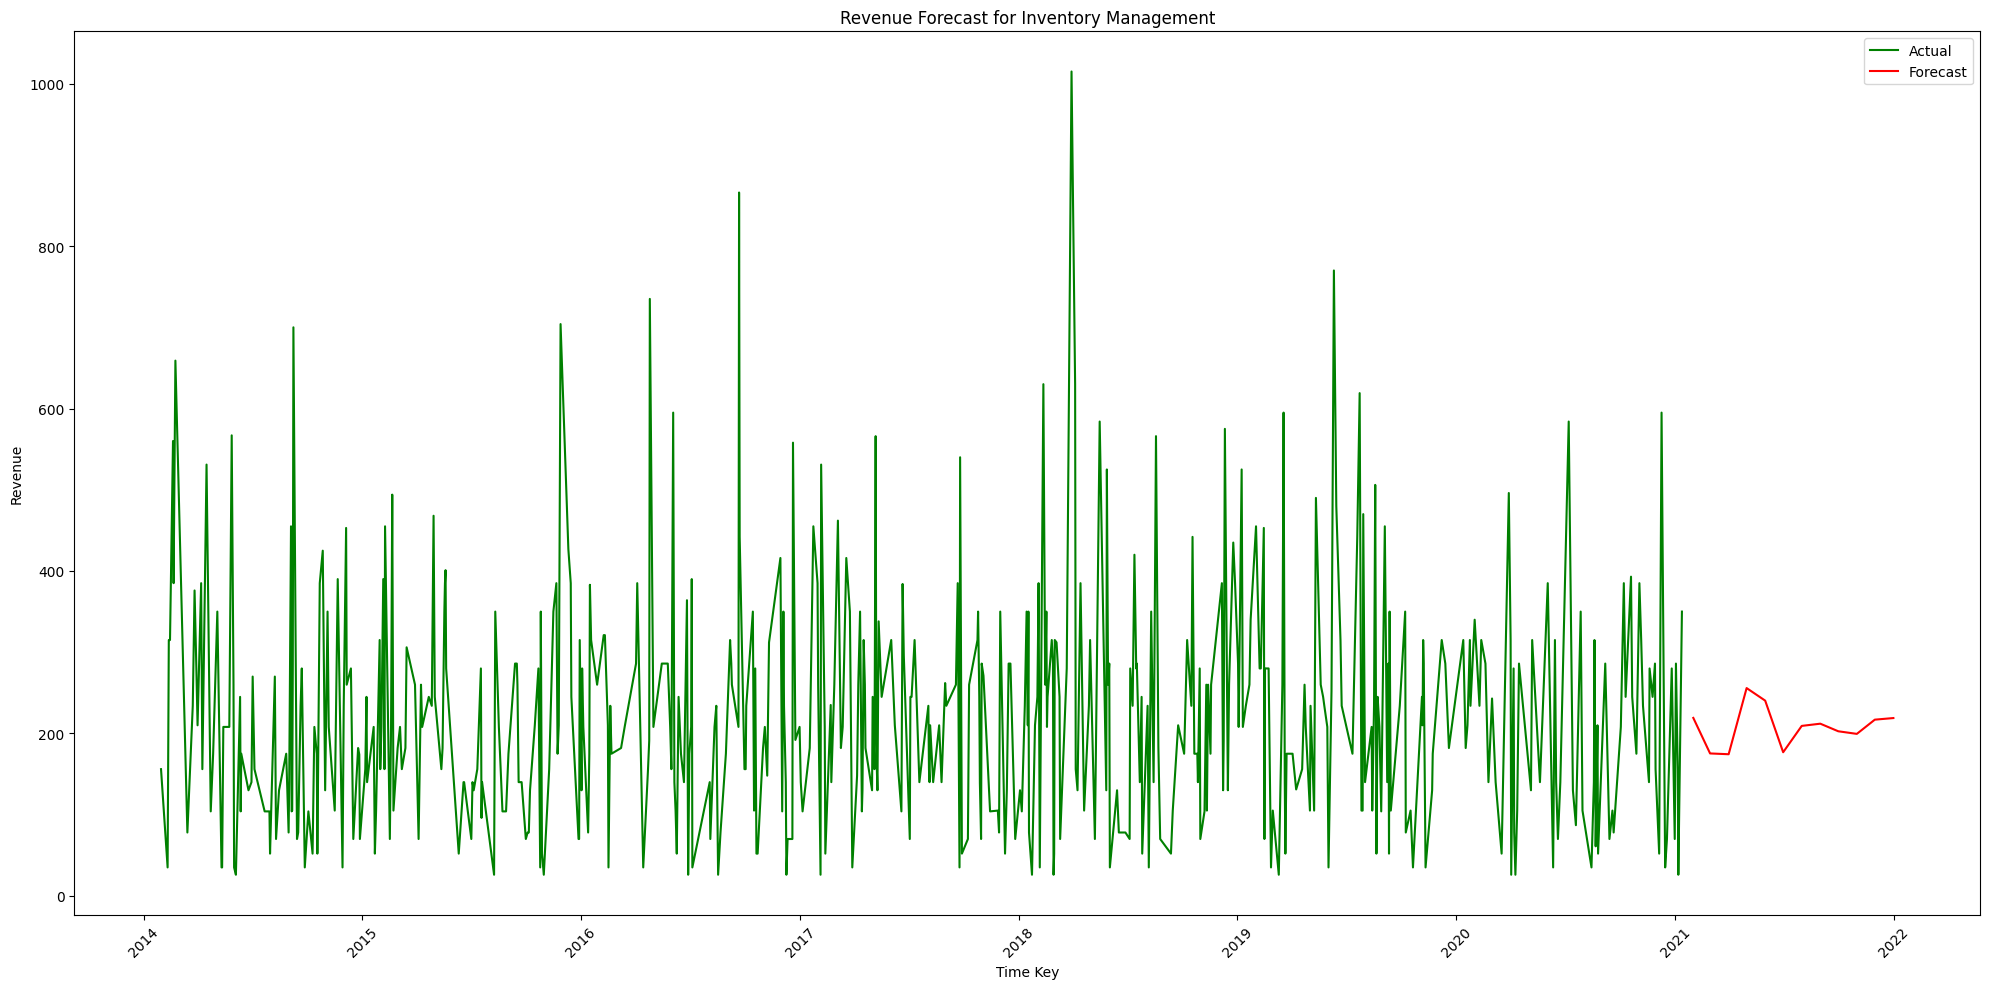

In [ ]:
time_series_data = filtered_dataset.groupby('date')['total_price'].sum().reset_index()
time_series_data['date'] = pd.to_datetime(time_series_data['date'])

model = ExponentialSmoothing(time_series_data['total_price'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.forecast(steps=12)
forecast_index = pd.date_range(start=time_series_data['date'].iloc[-1], periods=12, freq='M')

plt.figure(figsize=(20, 10))
plt.plot(time_series_data['date'], time_series_data['total_price'], label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Revenue Forecast for Inventory Management')
plt.xlabel('Time Key')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
